# Chapter 4 - Outliners (one variable)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as scistat

In [4]:
df = pd.read_csv("data/covidtotalswithmissings.csv")

In [5]:
df.set_index("iso_code", inplace=True)

In [12]:
totvars = [
    "location",
    "total_cases",
    "total_deaths",
    "total_cases_pm",
    "total_deaths_pm"
]

demovars = ["population",'pop_density', 'median_age',"gdp_per_capita","hosp_beds"]

In [14]:
df[totvars].describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.100000e+02,210.000000,209.000000,209.000000
mean,2.921614e+04,1770.714286,1361.842909,55.925440
std,1.363978e+05,8705.565857,2629.894101,145.081876
min,0.000000e+00,0.000000,0.894000,0.000000
25%,1.757500e+02,4.000000,96.785000,0.893000
50%,1.242500e+03,25.500000,281.997000,6.214000
75%,1.011700e+04,241.250000,1803.318000,32.158000
max,1.790191e+06,104383.000000,19771.348000,1237.551000


In [19]:
df[totvars].quantile(np.arange(0.0,1.1,0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.0,0.0,0.0,0.8940,0.0000
0.1,22.9,0.0,18.4870,0.0000
0.2,105.2,2.0,56.7386,0.4008
0.3,302.0,6.7,118.2282,1.7348
0.4,762.0,12.0,214.9182,3.9734
0.5,1242.5,25.5,281.9970,6.2140
0.6,2514.6,54.6,546.0534,12.5644
0.7,6959.8,137.2,1074.0324,26.0638
0.8,16847.2,323.2,2208.7374,50.2896
0.9,46513.1,1616.9,3771.9956,139.5290


In [20]:
df[totvars].skew()

total_cases        10.804275
total_deaths        8.929816
total_cases_pm      4.387402
total_deaths_pm     4.663124
dtype: float64

In [21]:
df[totvars].kurtosis()

total_cases        134.979577
total_deaths        95.737841
total_cases_pm      25.138915
total_deaths_pm     27.105135
dtype: float64

In [23]:
scistat.shapiro(df["total_cases"])

(0.19379639625549316, 3.753789128593843e-29)

In [28]:
def testnorm(var, dff):
    stat, p = scistat.shapiro(dff[var])
    return p

In [42]:
print(
    testnorm("total_cases", df),
    testnorm("total_deaths", df),
    testnorm("total_cases_pm", df)
)

3.753789128593843e-29 4.3427896631016077e-29 1.0


Text(0.5,1,'QQ Plot of Total Cases Per Million')

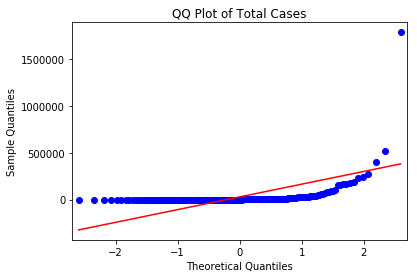

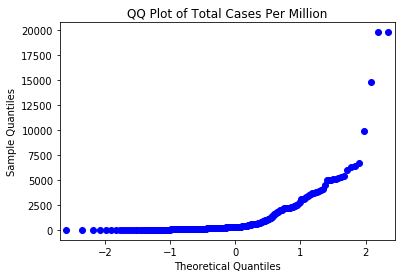

In [56]:
sm.qqplot(df[["total_cases"]].sort_values(["total_cases"]), line="s")
plt.title("QQ Plot of Total Cases")
sm.qqplot(df[["total_cases_pm"]].sort_values(["total_cases_pm"]), line="s")
plt.title("QQ Plot of Total Cases Per Million")

In [65]:
thirdq, firstq = df["total_cases"].quantile(0.75), df["total_cases"].quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
outlierhigh, outlierlow = interquartilerange + thirdq, firstq - interquartilerange

print(outlierlow,outlierhigh, sep="<-->")

-14736.125<-->25028.875


In [70]:
thirdq

10117.0

In [73]:
df.total_deaths.sum()

371850

In [68]:
df.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
count,2.100000e+02,210.000000,209.000000,209.000000,2.100000e+02,198.000000,186.000000,182.000000,164.000000
mean,2.921614e+04,1770.714286,1361.842909,55.925440,3.694276e+07,362.867434,30.627957,19539.154588,3.012671
std,1.363978e+05,8705.565857,2629.894101,145.081876,1.425092e+08,1581.438294,9.133152,19862.354091,2.464917
min,0.000000e+00,0.000000,0.894000,0.000000,8.090000e+02,0.137000,15.100000,661.240000,0.100000
25%,1.757500e+02,4.000000,96.785000,0.893000,1.031042e+06,37.416000,22.250000,4485.329000,1.300000
50%,1.242500e+03,25.500000,281.997000,6.214000,6.909866e+06,87.250000,30.250000,13183.081500,2.358500
75%,1.011700e+04,241.250000,1803.318000,32.158000,2.615868e+07,214.122000,39.000000,28556.527250,3.895750
max,1.790191e+06,104383.000000,19771.348000,1237.551000,1.439324e+09,19347.500000,48.200000,116935.600000,13.800000


Text(0,0.5,'Number of Countries')

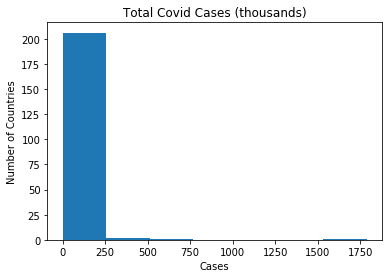

In [77]:
plt.hist(df["total_cases"]/1000, bins=7)
plt.title("Total Covid Cases (thousands)")
plt.xlabel("Cases")
plt.ylabel("Number of Countries")

Text(0,0.5,'Number of countries')

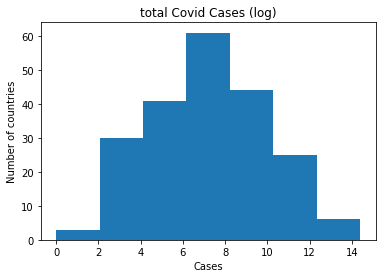

In [90]:
dflogs = df.copy()

dflogs = np.log1p(dflogs["total_cases"])

plt.hist(dflogs, bins=7)
plt.title("total Covid Cases (log)")
plt.xlabel("Cases")
plt.ylabel("Number of countries")